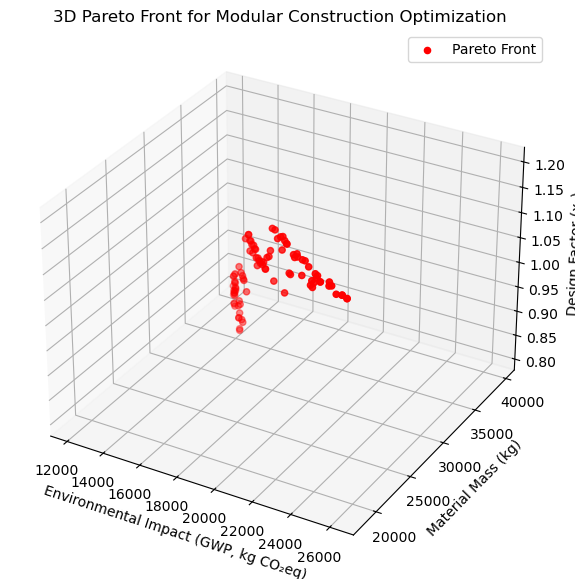

Design Variables: [0.8058467600468193, 0.8153970448135197, 0.8089401162843024, 0.8037547900138793] => Fitness (GWP, Mass): (12107.694864767944, 39833.91706559666)
Design Variables: [0.8058467600468193, 0.8153970448135197, 0.8089401162843024, 0.8037547900138793] => Fitness (GWP, Mass): (12107.694864767944, 39833.91706559666)
Design Variables: [1.1981557637993197, 1.1974135722717256, 1.1963160008635974, 1.1717498937548543] => Fitness (GWP, Mass): (26178.076141608042, 18364.58437443382)
Design Variables: [1.1981557637993197, 1.1974135722717256, 1.1963160008635974, 1.1717498937548543] => Fitness (GWP, Mass): (26178.076141608042, 18364.58437443382)
Design Variables: [1.1892881260056274, 1.184520901191717, 1.1907828211984988, 1.1400421314501339] => Fitness (GWP, Mass): (25398.715542136808, 19052.89685617264)
Design Variables: [1.197288135334691, 1.1119408834704012, 1.1947784698441983, 1.1427068663936422] => Fitness (GWP, Mass): (24807.404759995377, 19740.770903408047)
Design Variables: [0.97

In [11]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Baseline values for each unit type based on provided tables:
# (These values represent the nominal environmental impact and material mass)
baseline_GWP = [4430.97, 4462.73, 2656.35, 7004.18]  # in kg CO₂eq
baseline_mass = [7879.90, 6968.68, 6199.76, 7004.18]  # in kg

# Create the multi-objective fitness and individual classes
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Both objectives to minimize
creator.create("Individual", list, fitness=creator.FitnessMin)

# Setup toolbox for decision variables:
# Each individual has 4 continuous variables (one per unit type), in the range [0.8, 1.2]
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0.8, 1.2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 4)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function:
# For each unit, the environmental impact is modeled as baseline_GWP[i] * (x_i)^2,
# and the material mass as baseline_mass[i] * ((2 - x_i)^2).
# This creates a trade-off: lower x yields lower GWP but higher mass and vice versa.
def evalIndividual(ind):
    f1 = sum(baseline_GWP[i] * (ind[i] ** 2) for i in range(4))  # Total environmental impact
    f2 = sum(baseline_mass[i] * ((2 - ind[i]) ** 2) for i in range(4))  # Total material mass
    return f1, f2

toolbox.register("evaluate", evalIndividual)

# Register genetic operators:
# We use a simulated binary crossover and polynomial mutation, with bounds [0.8, 1.2]
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=0.8, up=1.2, eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=0.8, up=1.2, eta=20.0, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

def main():
    random.seed(42)
    # Create an initial population of 100 individuals
    pop = toolbox.population(n=100)
    ngen = 50   # Number of generations
    mu = 100    # Population size

    # Evaluate the initial population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    
    # Begin the evolutionary process
    for gen in range(1, ngen + 1):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.9, mutpb=0.1)
        # Evaluate the offspring
        fitnesses = map(toolbox.evaluate, offspring)
        for ind, fit in zip(offspring, fitnesses):
            ind.fitness.values = fit
        # Combine parents and offspring and select the next generation using NSGA-II
        pop = toolbox.select(pop + offspring, mu)
    
    return pop

if __name__ == "__main__":
    pop = main()
    # Extract the Pareto front (first non-dominated front)
    pareto_front = tools.sortNondominated(pop, k=len(pop), first_front_only=True)[0]
    
    # Plot the Pareto front: Environmental Impact (f1) vs. Material Mass (f2)
    f1_values = [ind.fitness.values[0] for ind in pareto_front]
    f2_values = [ind.fitness.values[1] for ind in pareto_front]
    design_factors = [ind[0] for ind in pareto_front]  # Example: using the first design variable

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(f1_values, f2_values, design_factors, c='red', marker='o', label='Pareto Front')
    ax.set_xlabel("Environmental Impact (GWP, kg CO₂eq)")
    ax.set_ylabel("Material Mass (kg)")
    ax.set_zlabel("Design Factor (x₁)")
    ax.set_title("3D Pareto Front for Modular Construction Optimization")
    ax.legend()

    plt.show()
    
    # Print Pareto optimal solutions
    for ind in pareto_front:
        print("Design Variables:", ind, "=> Fitness (GWP, Mass):", ind.fitness.values)


In [2]:
pip install deap

Note: you may need to restart the kernel to use updated packages.


c:\Users\trand\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\trand\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


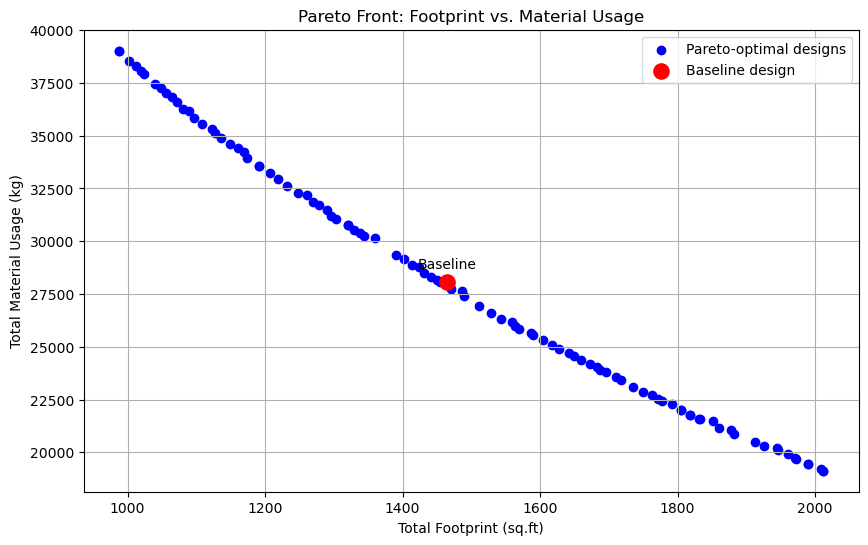

Pareto optimal designs:
Design Variables: [1.1913276150737477, 1.1909554254868993, 1.144719250478797, 1.1652943713671187] => Footprint & Material Usage: (2012.164414705577, 19129.643137057283)
Design Variables: [1.1913276150737477, 1.1909554254868993, 1.144719250478797, 1.1652943713671187] => Footprint & Material Usage: (2012.164414705577, 19129.643137057283)
Design Variables: [0.8216030784883229, 0.8125063986874131, 0.8159815328077806, 0.8316914845438108] => Footprint & Material Usage: (987.3010277110905, 39020.76386719451)
Design Variables: [0.8216030784883229, 0.8125063986874131, 0.8159815328077806, 0.8316914845438108] => Footprint & Material Usage: (987.3010277110905, 39020.76386719451)
Design Variables: [0.8580811484910394, 0.863297724282642, 0.8160614863161023, 0.8367680706163683] => Footprint & Material Usage: (1039.8895224916444, 37447.08133171577)
Design Variables: [1.1885470752454916, 1.0603884872426468, 0.9485963183238967, 0.991597134942515] => Footprint & Material Usage: (1

In [3]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Baseline values for each unit type:
# Footprint values (in sq.ft) for each of the four unit types
baseline_footprint = [350, 325, 385, 405]

# Material usage values (in kg) for each of the four unit types
baseline_material = [7879.90, 6968.68, 6199.76, 7004.18]

# Unit type labels for annotation in the plot
unit_labels = ['Wet Module', 'Dry Module', 'King Guestroom', 'Queen Guestroom']

# Create the multi-objective fitness and individual classes
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # We minimize both objectives
creator.create("Individual", list, fitness=creator.FitnessMin)

# Setup toolbox for decision variables:
# Each individual has 4 continuous variables (one per unit type) in the range [0.8, 1.2]
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0.8, 1.2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 4)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function:
# For each unit, the "footprint" is modeled as baseline_footprint[i] * (x_i)^2,
# and the "material usage" is modeled as baseline_material[i] * ((2 - x_i)^2).
# The idea is that lower design factor x might reduce footprint but increase material usage and vice versa.
def evalIndividual(ind):
    f1 = sum(baseline_footprint[i] * (ind[i] ** 2) for i in range(4))  # Total footprint
    f2 = sum(baseline_material[i] * ((2 - ind[i]) ** 2) for i in range(4))  # Total material usage
    return f1, f2

toolbox.register("evaluate", evalIndividual)

# Register genetic operators:
# We use a simulated binary crossover and polynomial mutation with bounds [0.8, 1.2]
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=0.8, up=1.2, eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=0.8, up=1.2, eta=20.0, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

def main():
    random.seed(42)
    # Create an initial population of 100 individuals
    pop = toolbox.population(n=100)
    ngen = 50   # Number of generations
    mu = 100    # Population size

    # Evaluate the initial population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    
    # Begin the evolutionary process
    for gen in range(1, ngen + 1):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.9, mutpb=0.1)
        # Evaluate the offspring
        fitnesses = map(toolbox.evaluate, offspring)
        for ind, fit in zip(offspring, fitnesses):
            ind.fitness.values = fit
        # Combine parents and offspring and select the next generation using NSGA-II
        pop = toolbox.select(pop + offspring, mu)
    
    return pop

if __name__ == "__main__":
    pop = main()
    # Extract the Pareto front (first non-dominated front)
    pareto_front = tools.sortNondominated(pop, k=len(pop), first_front_only=True)[0]
    
    # Plot the Pareto front: Footprint vs. Material Usage
    f1_values = [ind.fitness.values[0] for ind in pareto_front]
    f2_values = [ind.fitness.values[1] for ind in pareto_front]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(f1_values, f2_values, c="blue", label="Pareto-optimal designs")
    plt.xlabel("Total Footprint (sq.ft)")
    plt.ylabel("Total Material Usage (kg)")
    plt.title("Pareto Front: Footprint vs. Material Usage")
    plt.grid(True)
    
    # Optionally, annotate a few points.
    # Here we label the point corresponding to the baseline design (all design factors set to 1.0)
    baseline_ind = [1.0, 1.0, 1.0, 1.0]
    baseline_f1 = sum(baseline_footprint[i] * (baseline_ind[i] ** 2) for i in range(4))
    baseline_f2 = sum(baseline_material[i] * ((2 - baseline_ind[i]) ** 2) for i in range(4))
    plt.scatter(baseline_f1, baseline_f2, c="red", s=120, label="Baseline design")
    plt.annotate("Baseline", (baseline_f1, baseline_f2), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.legend()
    plt.show()
    
    # Print Pareto optimal solutions
    print("Pareto optimal designs:")
    for ind in pareto_front:
        print("Design Variables:", ind, "=> Footprint & Material Usage:", ind.fitness.values)


In [4]:
pip install deap numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


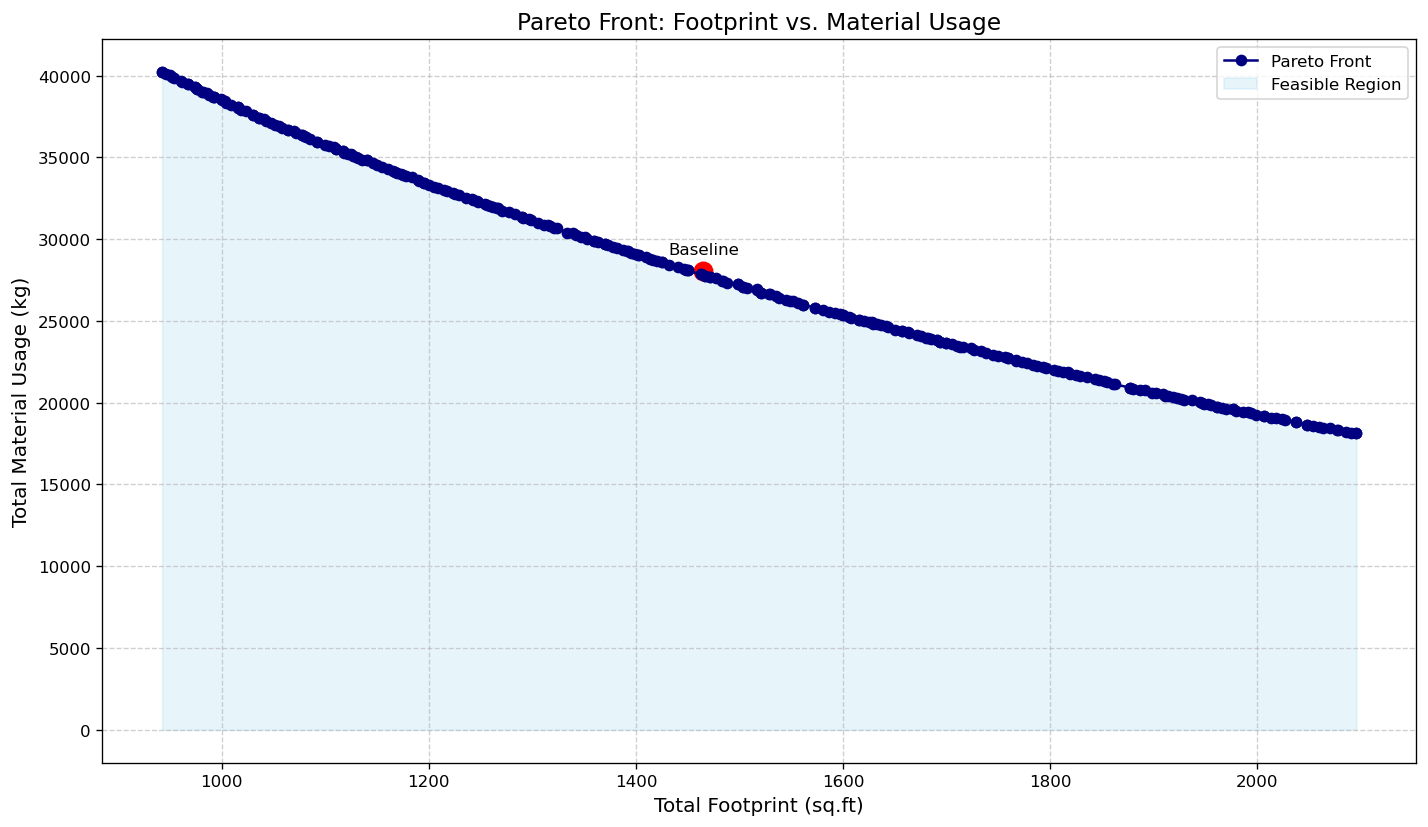

Pareto optimal designs:
Design Variables: [1.199, 1.195, 1.19, 1.199] => Footprint: 2095.42 | Material Usage: 18123.07
Design Variables: [1.199, 1.195, 1.19, 1.199] => Footprint: 2095.42 | Material Usage: 18123.07
Design Variables: [0.806, 0.802, 0.8, 0.8] => Footprint: 942.52 | Material Usage: 40232.45
Design Variables: [0.806, 0.802, 0.8, 0.8] => Footprint: 942.52 | Material Usage: 40232.45
Design Variables: [1.064, 1.074, 0.918, 0.912] => Footprint: 1431.82 | Material Usage: 28440.09
Design Variables: [1.199, 1.197, 1.055, 1.071] => Footprint: 1862.25 | Material Usage: 21125.34
Design Variables: [1.025, 1.004, 0.86, 0.895] => Footprint: 1305.2 | Material Usage: 30998.22
Design Variables: [0.93, 0.919, 0.801, 0.803] => Footprint: 1085.34 | Material Usage: 36114.33
Design Variables: [0.842, 0.883, 0.801, 0.802] => Footprint: 1008.91 | Material Usage: 38232.49
Design Variables: [0.915, 0.909, 0.809, 0.841] => Footprint: 1100.17 | Material Usage: 35770.08
Design Variables: [1.164, 1.096

In [7]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Baseline values
baseline_footprint = [350, 325, 385, 405]
baseline_material = [7879.90, 6968.68, 6199.76, 7004.18]
unit_labels = ['Wet Module', 'Dry Module', 'King Guestroom', 'Queen Guestroom']

# Normalization factors
max_footprint = sum(baseline_footprint[i] * (1.2 ** 2) for i in range(4))  # Max design stretch
max_material = sum(baseline_material[i] * ((2 - 0.8) ** 2) for i in range(4))  # Max penalty

# DEAP setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Minimize both
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0.8, 1.2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 4)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Normalized evaluation
def evalIndividual(ind):
    raw_footprint = sum(baseline_footprint[i] * (ind[i] ** 2) for i in range(4))
    raw_material = sum(baseline_material[i] * ((2 - ind[i]) ** 2) for i in range(4))
    norm_f1 = raw_footprint / max_footprint
    norm_f2 = raw_material / max_material
    return norm_f1, norm_f2

toolbox.register("evaluate", evalIndividual)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=0.8, up=1.2, eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=0.8, up=1.2, eta=20.0, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

def main():
    random.seed(42)
    pop_size = 300
    ngen = 100
    mu = pop_size

    pop = toolbox.population(n=pop_size)

    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    for gen in range(1, ngen + 1):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.7, mutpb=0.3)
        for ind in offspring:
            ind.fitness.values = toolbox.evaluate(ind)
        pop = toolbox.select(pop + offspring, mu)

    return pop

if __name__ == "__main__":
    pop = main()
    pareto_front = tools.sortNondominated(pop, k=len(pop), first_front_only=True)[0]

    # Rescale normalized values back to raw units for plotting
    footprint_vals = [ind.fitness.values[0] * max_footprint for ind in pareto_front]
    material_vals = [ind.fitness.values[1] * max_material for ind in pareto_front]

    # Sort for line plotting
    sorted_pairs = sorted(zip(footprint_vals, material_vals), key=lambda x: x[0])
    f1_sorted, f2_sorted = zip(*sorted_pairs)

    # High-quality Pareto Plot
    plt.figure(figsize=(12, 7), dpi=120)
    plt.plot(f1_sorted, f2_sorted, marker='o', linestyle='-', color='navy', label="Pareto Front")
    plt.fill_between(f1_sorted, f2_sorted, color='skyblue', alpha=0.2, label="Feasible Region")

    plt.xlabel("Total Footprint (sq.ft)", fontsize=12)
    plt.ylabel("Total Material Usage (kg)", fontsize=12)
    plt.title("Pareto Front: Footprint vs. Material Usage", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

    # Highlight baseline
    baseline_ind = [1.0, 1.0, 1.0, 1.0]
    baseline_f1 = sum(baseline_footprint[i] * (baseline_ind[i] ** 2) for i in range(4))
    baseline_f2 = sum(baseline_material[i] * ((2 - baseline_ind[i]) ** 2) for i in range(4))
    plt.scatter(baseline_f1, baseline_f2, color='red', s=120, label='Baseline design')
    plt.annotate("Baseline", (baseline_f1, baseline_f2), textcoords="offset points", xytext=(0,10), ha='center')

    plt.tight_layout()
    plt.show()

    # Output summary
    print("Pareto optimal designs:")
    for ind in pareto_front:
        raw_fp = sum(baseline_footprint[i] * (ind[i] ** 2) for i in range(4))
        raw_mat = sum(baseline_material[i] * ((2 - ind[i]) ** 2) for i in range(4))
        print("Design Variables:", [round(x, 3) for x in ind],
              "=> Footprint:", round(raw_fp, 2),
              "| Material Usage:", round(raw_mat, 2))


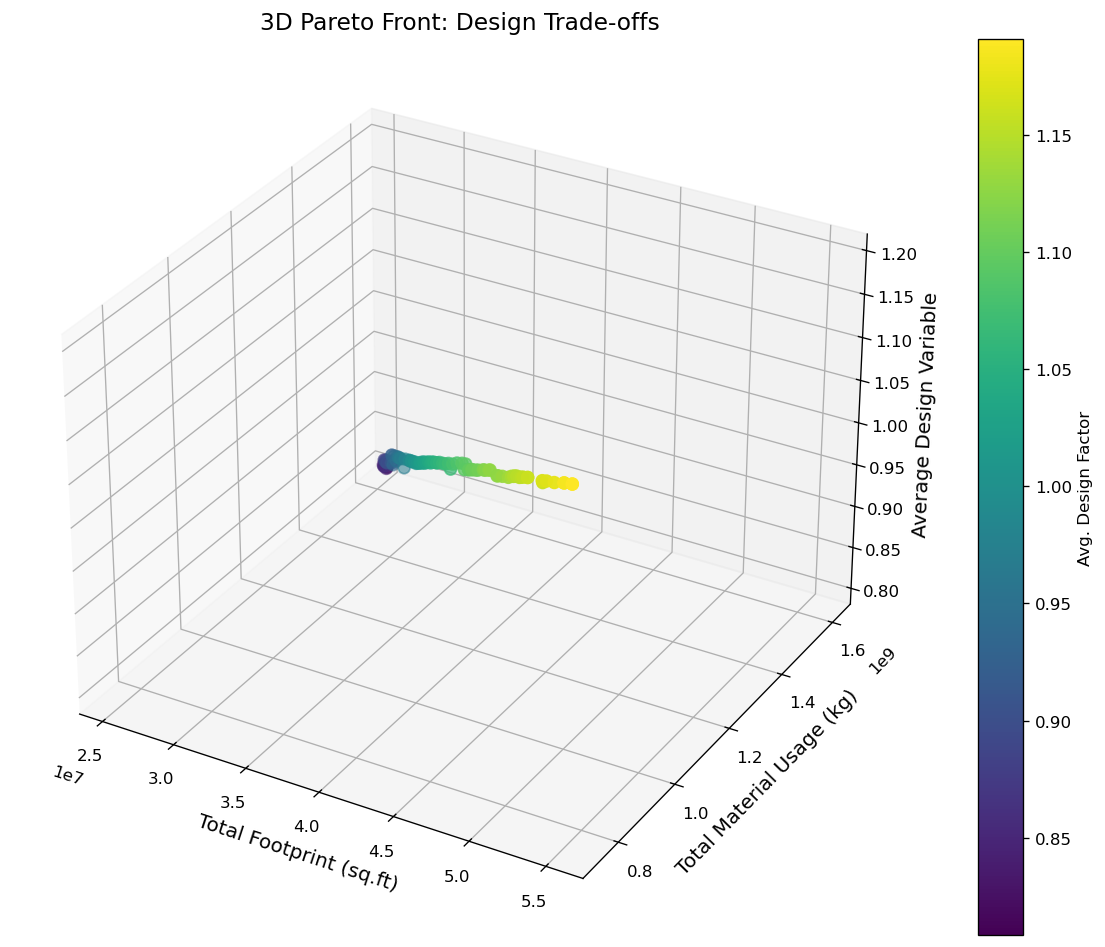

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare 3D data from Pareto front
footprint_vals = [ind.fitness.values[0] * max_footprint for ind in pareto_front]
material_vals = [ind.fitness.values[1] * max_material for ind in pareto_front]
design_avg_vals = [np.mean(ind) for ind in pareto_front]  # Third axis

# Plot in 3D
fig = plt.figure(figsize=(12, 8), dpi=120)
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(footprint_vals, material_vals, design_avg_vals,
                c=design_avg_vals, cmap='viridis', s=50, label="Pareto Front")

ax.set_xlabel("Total Footprint (sq.ft)", fontsize=12)
ax.set_ylabel("Total Material Usage (kg)", fontsize=12)
ax.set_zlabel("Average Design Variable", fontsize=12)
ax.set_title("3D Pareto Front: Design Trade-offs", fontsize=14)
fig.colorbar(sc, ax=ax, label="Avg. Design Factor")
plt.tight_layout()
plt.show()



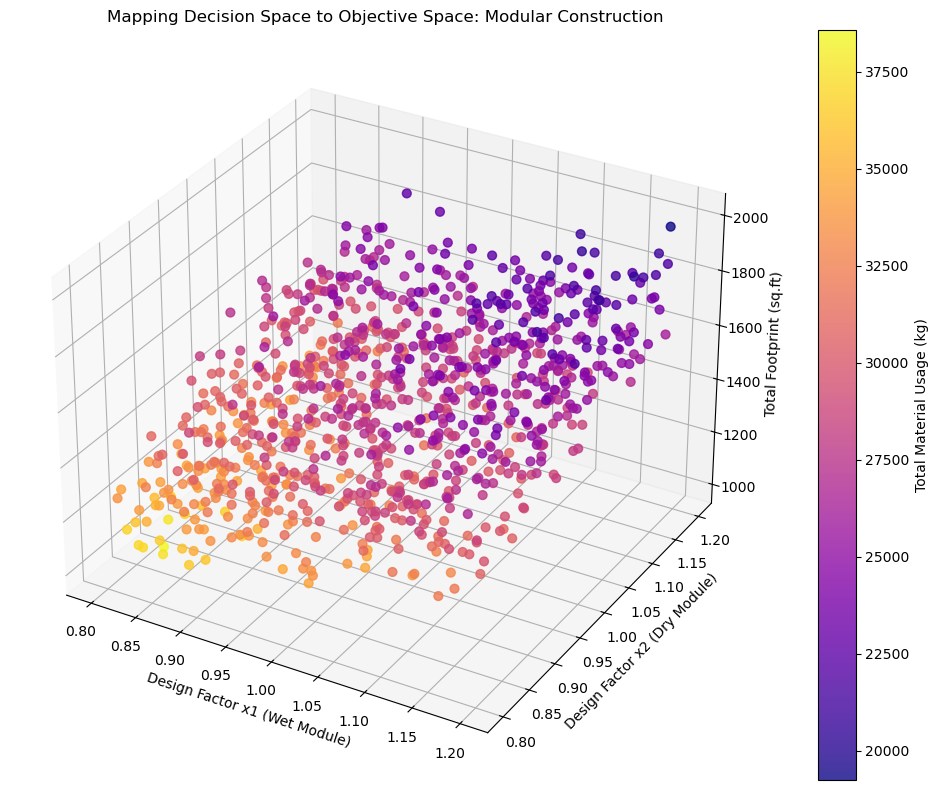

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define constants
baseline_footprint = [350, 325, 385, 405]
baseline_material = [7879.90, 6968.68, 6199.76, 7004.18]

# Generate random designs in decision space
n_samples = 1000
X = np.random.uniform(low=0.8, high=1.2, size=(n_samples, 4))  # Design variables for each unit

# Evaluate in objective space
footprints = np.sum([baseline_footprint[i] * (X[:, i] ** 2) for i in range(4)], axis=0)
materials = np.sum([baseline_material[i] * ((2 - X[:, i]) ** 2) for i in range(4)], axis=0)

# Prepare DataFrame
df = pd.DataFrame(X, columns=[f"x{i+1}" for i in range(4)])
df["Total Footprint"] = footprints
df["Total Material"] = materials

# 3D Plot: Map decision variables (e.g., x1, x2) to objective outcomes
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df["x1"], df["x2"], df["Total Footprint"], c=df["Total Material"],
                cmap="plasma", s=40, alpha=0.8)

ax.set_xlabel("Design Factor x1 (Wet Module)")
ax.set_ylabel("Design Factor x2 (Dry Module)")
ax.set_zlabel("Total Footprint (sq.ft)")
fig.colorbar(sc, label="Total Material Usage (kg)")
plt.title("Mapping Decision Space to Objective Space: Modular Construction")
plt.tight_layout()
plt.show()


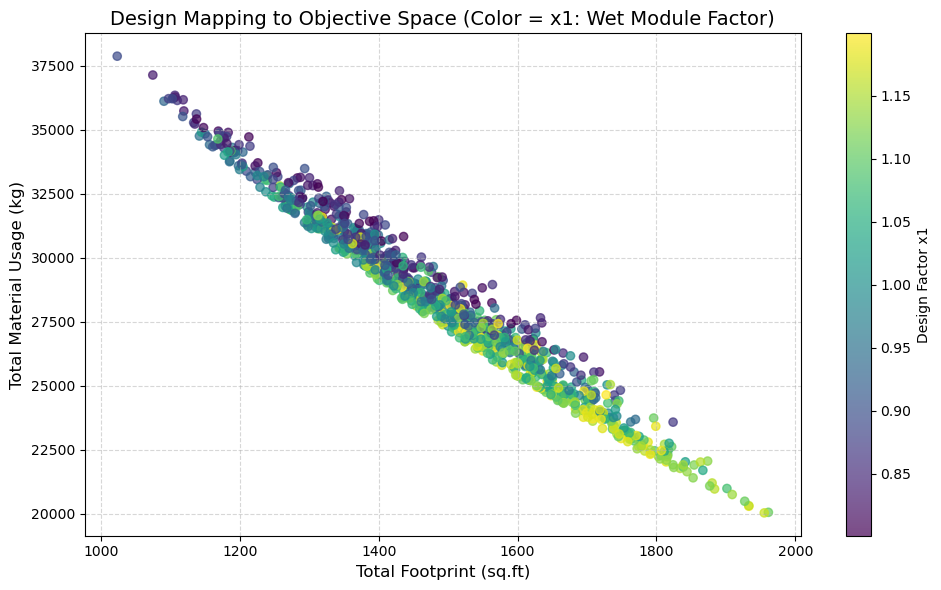

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Baseline input for 4 unit types
baseline_footprint = [350, 325, 385, 405]
baseline_material = [7879.90, 6968.68, 6199.76, 7004.18]

# Step 1: Sample designs in the decision space (x1–x4)
n_samples = 1000
X = np.random.uniform(0.8, 1.2, size=(n_samples, 4))  # 4 design variables between 0.8–1.2

# Step 2: Evaluate in objective space
footprints = np.sum([baseline_footprint[i] * (X[:, i] ** 2) for i in range(4)], axis=0)
materials = np.sum([baseline_material[i] * ((2 - X[:, i]) ** 2) for i in range(4)], axis=0)

# Step 3: Create DataFrame
df = pd.DataFrame(X, columns=[f"x{i+1}" for i in range(4)])
df["Total Footprint"] = footprints
df["Total Material"] = materials

# Step 4: 2D Scatter Plot - Objective Space
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["Total Footprint"], df["Total Material"], c=X[:, 0], cmap='viridis', alpha=0.7)

plt.xlabel("Total Footprint (sq.ft)", fontsize=12)
plt.ylabel("Total Material Usage (kg)", fontsize=12)
plt.title("Design Mapping to Objective Space (Color = x1: Wet Module Factor)", fontsize=14)
plt.colorbar(scatter, label="Design Factor x1")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


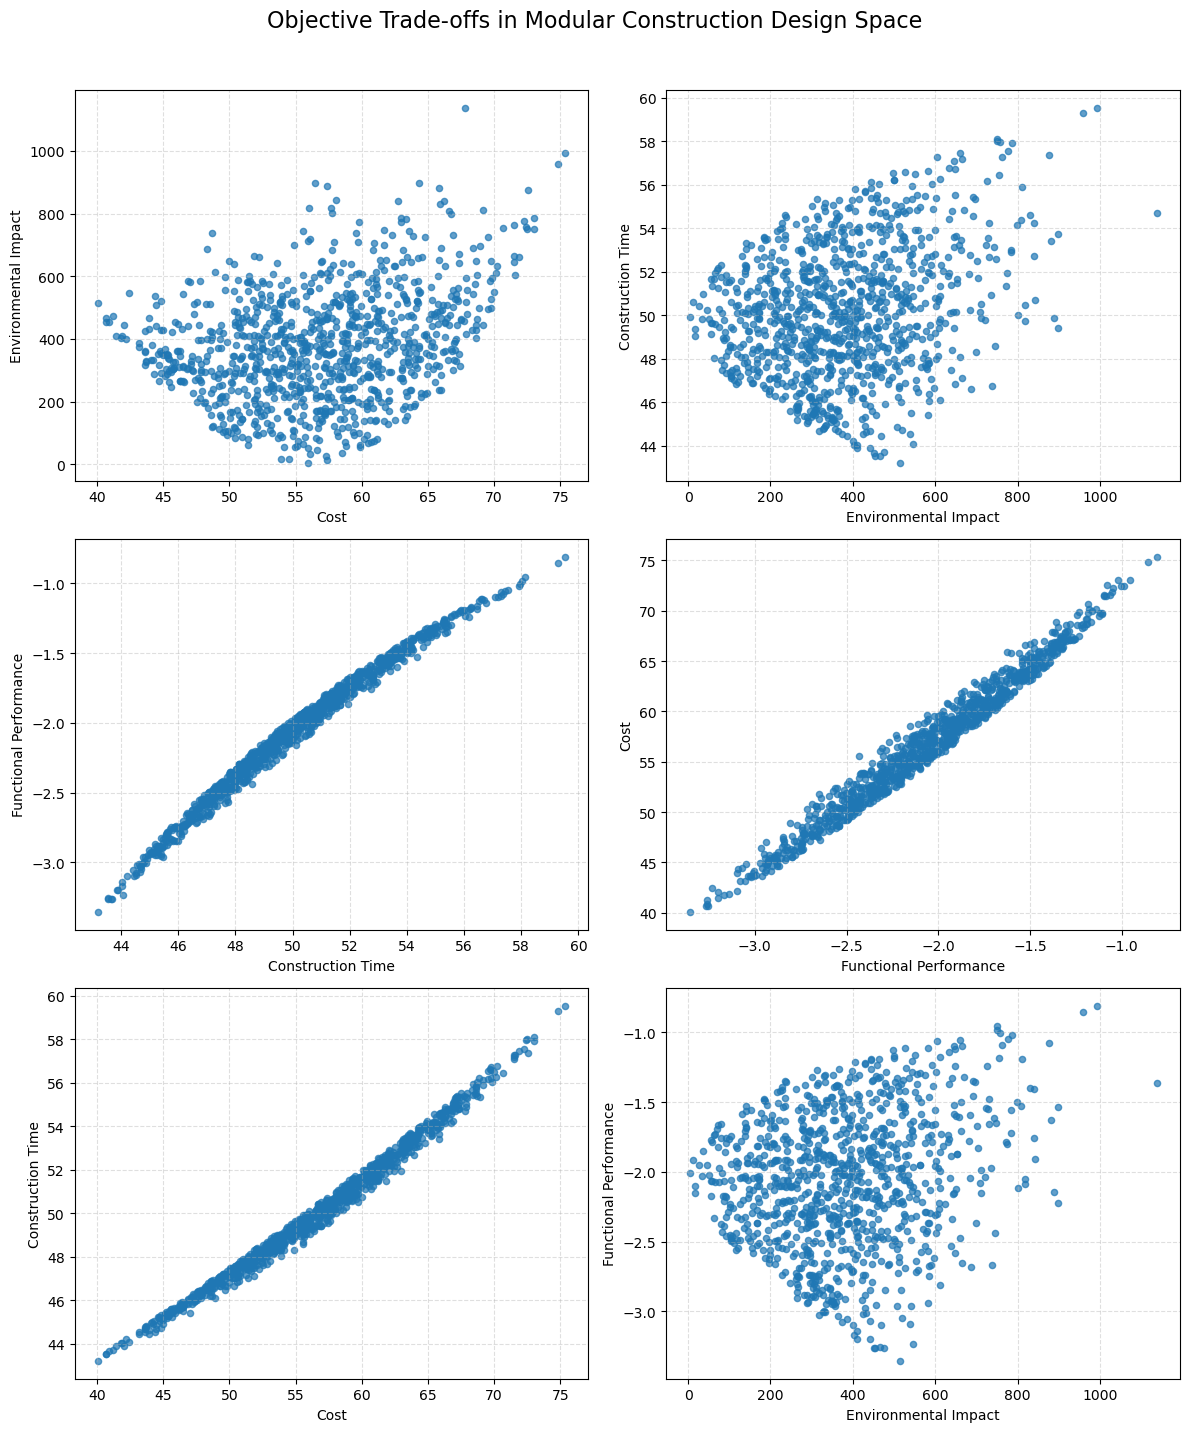

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Baseline unit data
baseline_footprint = [350, 325, 385, 405]
baseline_material = [7879.90, 6968.68, 6199.76, 7004.18]
baseline_avg_footprint = np.mean(baseline_footprint)

# Step 1: Generate 1000 random designs
n_samples = 1000
X = np.random.uniform(0.8, 1.2, size=(n_samples, 4))  # Design variables

# Step 2: Calculate objective proxies
total_footprint = np.sum([baseline_footprint[i] * (X[:, i] ** 2) for i in range(4)], axis=0)
total_material = np.sum([baseline_material[i] * ((2 - X[:, i]) ** 2) for i in range(4)], axis=0)

cost = total_material * 0.002  # Simulated cost proxy
env_impact = total_material * np.mean((X - 1) ** 2, axis=1)  # Penalty-based impact
construction_time = 1 / np.mean(X, axis=1) * 50  # Slower for lower design factors
functional_perf = 1 - np.abs(total_footprint - baseline_avg_footprint) / baseline_avg_footprint  # Efficiency metric

# Step 3: Create DataFrame
df = pd.DataFrame({
    "Cost": cost,
    "Environmental Impact": env_impact,
    "Construction Time": construction_time,
    "Functional Performance": functional_perf
})

# Step 4: Plot the 6 requested 2D objective combinations
fig, axs = plt.subplots(3, 2, figsize=(12, 14))

# (1) Cost vs. Environmental Impact
axs[0, 0].scatter(df["Cost"], df["Environmental Impact"], s=20, alpha=0.7)
axs[0, 0].set_xlabel("Cost")
axs[0, 0].set_ylabel("Environmental Impact")

# (2) Environmental Impact vs. Construction Time
axs[0, 1].scatter(df["Environmental Impact"], df["Construction Time"], s=20, alpha=0.7)
axs[0, 1].set_xlabel("Environmental Impact")
axs[0, 1].set_ylabel("Construction Time")

# (3) Construction Time vs. Functional Performance
axs[1, 0].scatter(df["Construction Time"], df["Functional Performance"], s=20, alpha=0.7)
axs[1, 0].set_xlabel("Construction Time")
axs[1, 0].set_ylabel("Functional Performance")

# (4) Functional Performance vs. Cost
axs[1, 1].scatter(df["Functional Performance"], df["Cost"], s=20, alpha=0.7)
axs[1, 1].set_xlabel("Functional Performance")
axs[1, 1].set_ylabel("Cost")

# (5) Cost vs. Construction Time
axs[2, 0].scatter(df["Cost"], df["Construction Time"], s=20, alpha=0.7)
axs[2, 0].set_xlabel("Cost")
axs[2, 0].set_ylabel("Construction Time")

# (6) Environmental Impact vs. Functional Performance
axs[2, 1].scatter(df["Environmental Impact"], df["Functional Performance"], s=20, alpha=0.7)
axs[2, 1].set_xlabel("Environmental Impact")
axs[2, 1].set_ylabel("Functional Performance")

# Clean up
for ax in axs.flat:
    ax.grid(True, linestyle="--", alpha=0.4)

plt.suptitle("Objective Trade-offs in Modular Construction Design Space", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [21]:
import numpy as np
import pandas as pd

# Simulate the design space and objectives again
n_samples = 300
X = np.random.uniform(0.8, 1.2, size=(n_samples, 4))  # Design variables

# Objectives
baseline_footprint = [350, 325, 385, 405]
baseline_material = [7879.90, 6968.68, 6199.76, 7004.18]
baseline_avg_footprint = np.mean(baseline_footprint)

footprint = np.sum([baseline_footprint[i] * (X[:, i] ** 2) for i in range(4)], axis=0)
material = np.sum([baseline_material[i] * ((2 - X[:, i]) ** 2) for i in range(4)], axis=0)

cost = material * 0.002
env_impact = material * np.mean((X - 1) ** 2, axis=1)
construction_time = 1 / np.mean(X, axis=1) * 50
functional_perf = 1 - np.abs(footprint - baseline_avg_footprint) / baseline_avg_footprint

# Build DataFrame for evaluation
df = pd.DataFrame({
    "Cost": cost,
    "Environmental Impact": env_impact,
    "Construction Time": construction_time,
    "Functional Performance": functional_perf
})

# 1. Empty list to store dominated design IDs
dominated_ids = []

# 2. Loop through all designs
n = len(df)
for i in range(n):
    for j in range(n):
        if i == j:
            continue
        
        # 3. Check if design j dominates design i
        dominates = (
            df.loc[j, "Cost"] <= df.loc[i, "Cost"] and
            df.loc[j, "Environmental Impact"] <= df.loc[i, "Environmental Impact"] and
            df.loc[j, "Construction Time"] <= df.loc[i, "Construction Time"] and
            df.loc[j, "Functional Performance"] >= df.loc[i, "Functional Performance"] and
            (
                df.loc[j, "Cost"] < df.loc[i, "Cost"] or
                df.loc[j, "Environmental Impact"] < df.loc[i, "Environmental Impact"] or
                df.loc[j, "Construction Time"] < df.loc[i, "Construction Time"] or
                df.loc[j, "Functional Performance"] > df.loc[i, "Functional Performance"]
            )
        )
        
        if dominates:
            dominated_ids.append(i)
            break  # No need to keep checking if already dominated

# 4. Compute non-dominated set
all_ids = set(range(n))
dominated_ids = list(set(dominated_ids))  # Remove duplicates
non_dominated_ids = all_ids.difference(dominated_ids)

# 5. Label designs in the dataframe
df["Pareto"] = "Dominated"
df.loc[list(non_dominated_ids), "Pareto"] = "Non-Dominated"

# 6. Output
print("Dominated designs: ", sorted(dominated_ids))
print("Non-dominated designs: ", sorted(non_dominated_ids))
print("Number of non-dominating designs:", len(non_dominated_ids))

# Optional: view top non-dominated results
df[df["Pareto"] == "Non-Dominated"].head()


Dominated designs:  [0, 1, 2, 4, 6, 7, 9, 10, 11, 13, 15, 16, 19, 21, 23, 24, 25, 34, 37, 38, 39, 40, 41, 44, 45, 47, 48, 52, 53, 54, 56, 58, 59, 61, 62, 63, 65, 66, 67, 70, 71, 72, 73, 79, 80, 81, 82, 84, 85, 86, 88, 91, 92, 93, 96, 107, 108, 111, 112, 113, 114, 118, 120, 121, 123, 124, 126, 127, 128, 131, 132, 133, 134, 136, 137, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 151, 155, 157, 158, 159, 161, 163, 164, 165, 166, 167, 170, 171, 172, 173, 174, 178, 179, 180, 181, 183, 187, 188, 189, 190, 191, 197, 199, 200, 201, 202, 204, 205, 206, 207, 209, 212, 213, 215, 216, 218, 220, 221, 226, 227, 228, 230, 232, 234, 235, 236, 237, 240, 242, 244, 248, 254, 255, 256, 257, 258, 263, 265, 266, 267, 271, 276, 277, 278, 279, 280, 281, 282, 283, 285, 286, 289, 290, 291, 293, 298, 299]
Non-dominated designs:  [3, 5, 8, 12, 14, 17, 18, 20, 22, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 42, 43, 46, 49, 50, 51, 55, 57, 60, 64, 68, 69, 74, 75, 76, 77, 78, 83, 87, 89, 90, 94, 95, 97, 98, 99, 100,

,Cost,Environmental Impact,Construction Time,Functional Performance,Pareto
3,51.629681,111.428698,47.972194,-2.350682,Non-Dominated
5,56.993874,712.444973,50.096194,-1.979217,Non-Dominated
8,60.064082,443.847812,51.705248,-1.719459,Non-Dominated
12,47.899977,345.460906,46.527412,-2.635070,Non-Dominated
14,47.177451,218.625185,46.270025,-2.686180,Non-Dominated


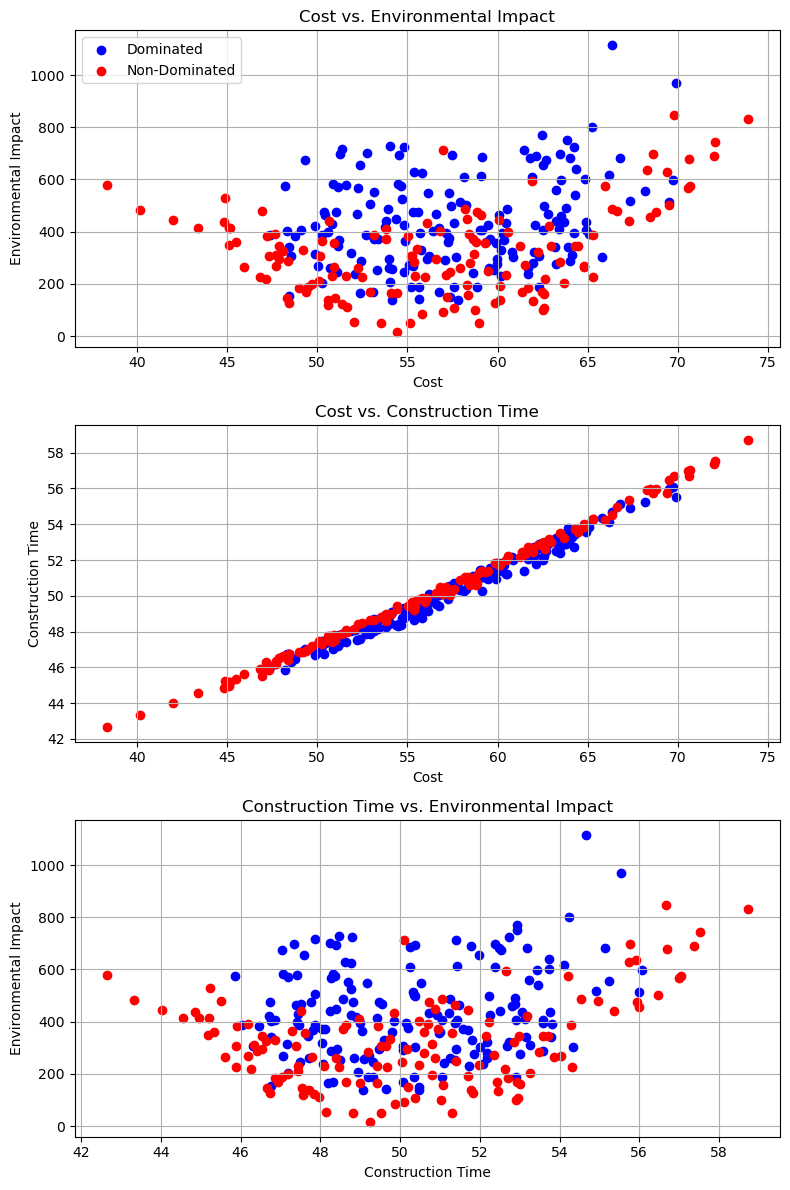

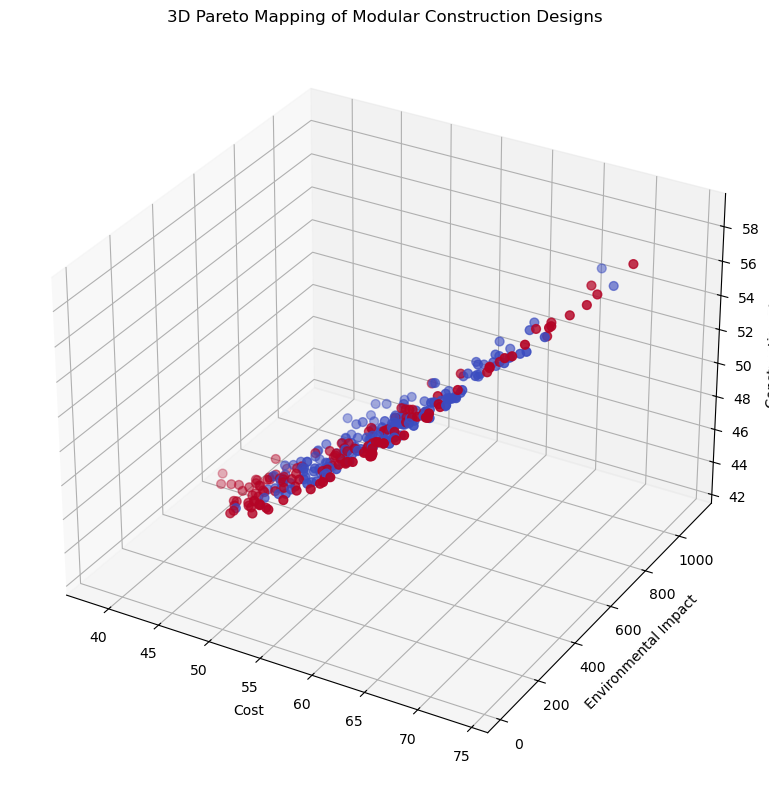

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Create list of flags using list comprehension
non_dominated_flags = [1 if i in non_dominated_ids else 0 for i in range(n_samples)]
df["non-dominated"] = non_dominated_flags

# Step 2: Fill arrays for plotting
res_weight_dominated = df.loc[df["non-dominated"] == 0, "Cost"]
res_delta_dominated = df.loc[df["non-dominated"] == 0, "Environmental Impact"]
res_sigma_dominated = df.loc[df["non-dominated"] == 0, "Construction Time"]

res_weight_nondominated = df.loc[df["non-dominated"] == 1, "Cost"]
res_delta_nondominated = df.loc[df["non-dominated"] == 1, "Environmental Impact"]
res_sigma_nondominated = df.loc[df["non-dominated"] == 1, "Construction Time"]

# Step 3: Plot in 2D
f, axs = plt.subplots(3, figsize=(8, 12))

axs[0].scatter(res_weight_dominated, res_delta_dominated, c='blue', label="Dominated")
axs[0].scatter(res_weight_nondominated, res_delta_nondominated, c='red', marker="o", label="Non-Dominated")
axs[0].set_xlabel("Cost")
axs[0].set_ylabel("Environmental Impact")
axs[0].set_title("Cost vs. Environmental Impact")
axs[0].grid(True)
axs[0].legend()

axs[1].scatter(res_weight_dominated, res_sigma_dominated, c='blue')
axs[1].scatter(res_weight_nondominated, res_sigma_nondominated, c='red', marker="o")
axs[1].set_xlabel("Cost")
axs[1].set_ylabel("Construction Time")
axs[1].set_title("Cost vs. Construction Time")
axs[1].grid(True)

axs[2].scatter(res_sigma_dominated, res_delta_dominated, c='blue')
axs[2].scatter(res_sigma_nondominated, res_delta_nondominated, c='red', marker="o")
axs[2].set_xlabel("Construction Time")
axs[2].set_ylabel("Environmental Impact")
axs[2].set_title("Construction Time vs. Environmental Impact")
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Step 4: 3D Pareto Plot — Be proud of your work!
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use color = flag to distinguish Pareto front
ax.scatter(df['Cost'], df['Environmental Impact'], df['Construction Time'],
           c=df['non-dominated'], cmap="coolwarm", s=40)

ax.set_xlabel("Cost")
ax.set_ylabel("Environmental Impact")
ax.set_zlabel("Construction Time")
ax.set_title("3D Pareto Mapping of Modular Construction Designs")

plt.tight_layout()
plt.show()
        

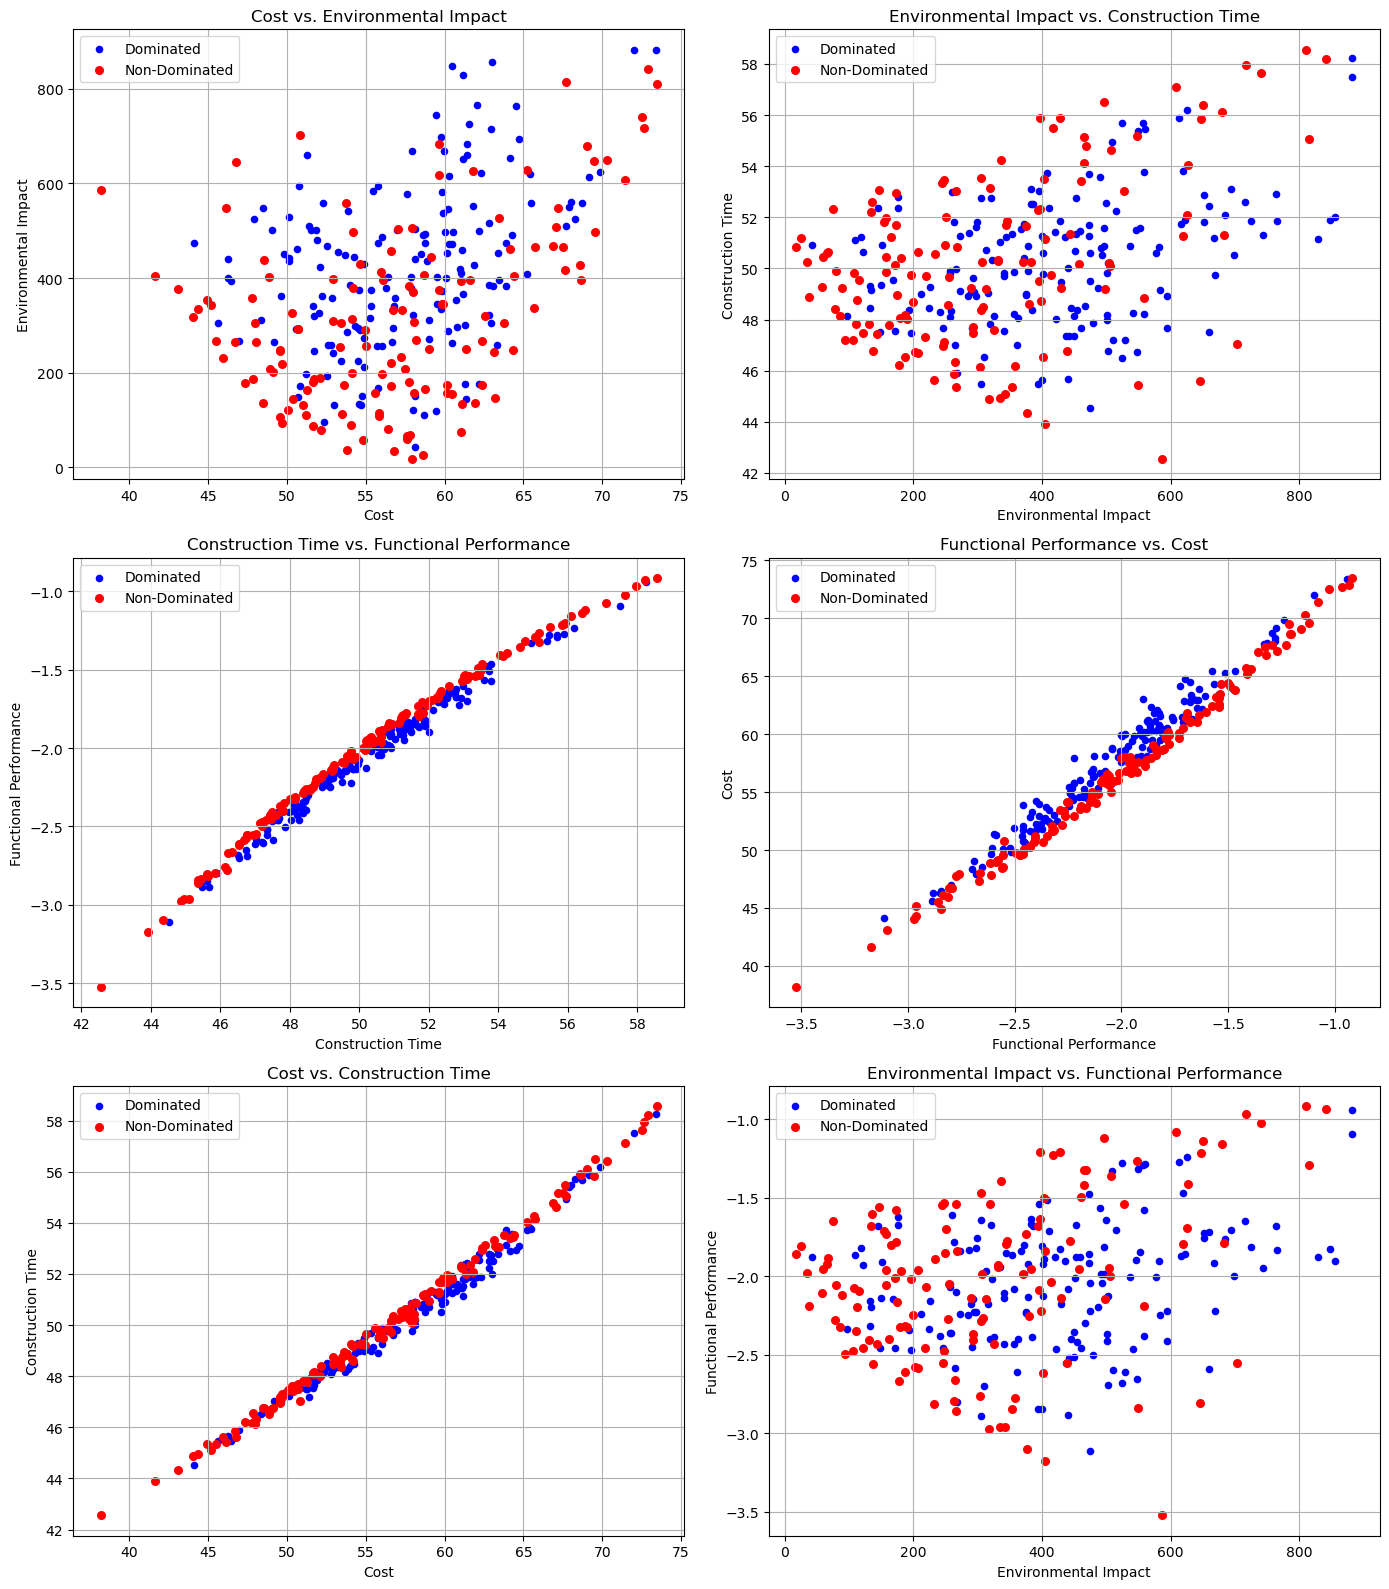

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate design samples
n_samples = 300
X = np.random.uniform(0.8, 1.2, size=(n_samples, 4))  # x1–x4 design factors

# Step 2: Modular construction parameters
baseline_footprint = [350, 325, 385, 405]
baseline_material = [7879.90, 6968.68, 6199.76, 7004.18]
baseline_avg_footprint = np.mean(baseline_footprint)

# Step 3: Compute objectives
footprint = np.sum([baseline_footprint[i] * (X[:, i] ** 2) for i in range(4)], axis=0)
material = np.sum([baseline_material[i] * ((2 - X[:, i]) ** 2) for i in range(4)], axis=0)

cost = material * 0.002
env_impact = material * np.mean((X - 1) ** 2, axis=1)
construction_time = 1 / np.mean(X, axis=1) * 50
functional_perf = 1 - np.abs(footprint - baseline_avg_footprint) / baseline_avg_footprint

# Step 4: Build DataFrame
df = pd.DataFrame({
    "Cost": cost,
    "Environmental Impact": env_impact,
    "Construction Time": construction_time,
    "Functional Performance": functional_perf
})

# Step 5: Manual Pareto sorting
dominated_ids = []
for i in range(n_samples):
    for j in range(n_samples):
        if i == j:
            continue
        dominates = (
            df.loc[j, "Cost"] <= df.loc[i, "Cost"] and
            df.loc[j, "Environmental Impact"] <= df.loc[i, "Environmental Impact"] and
            df.loc[j, "Construction Time"] <= df.loc[i, "Construction Time"] and
            df.loc[j, "Functional Performance"] >= df.loc[i, "Functional Performance"] and
            (
                df.loc[j, "Cost"] < df.loc[i, "Cost"] or
                df.loc[j, "Environmental Impact"] < df.loc[i, "Environmental Impact"] or
                df.loc[j, "Construction Time"] < df.loc[i, "Construction Time"] or
                df.loc[j, "Functional Performance"] > df.loc[i, "Functional Performance"]
            )
        )
        if dominates:
            dominated_ids.append(i)
            break

# Step 6: Label non-dominated
all_ids = set(range(n_samples))
dominated_ids = list(set(dominated_ids))
non_dominated_ids = all_ids.difference(dominated_ids)
df["non-dominated"] = [1 if i in non_dominated_ids else 0 for i in range(n_samples)]

# Step 7: Function to extract points
def get_vals(col_x, col_y):
    dom_x = df.loc[df["non-dominated"] == 0, col_x]
    dom_y = df.loc[df["non-dominated"] == 0, col_y]
    non_x = df.loc[df["non-dominated"] == 1, col_x]
    non_y = df.loc[df["non-dominated"] == 1, col_y]
    return dom_x, dom_y, non_x, non_y

# Step 8: Create Pareto plots
fig, axs = plt.subplots(3, 2, figsize=(14, 16))

pairs = [
    ("Cost", "Environmental Impact"),
    ("Environmental Impact", "Construction Time"),
    ("Construction Time", "Functional Performance"),
    ("Functional Performance", "Cost"),
    ("Cost", "Construction Time"),
    ("Environmental Impact", "Functional Performance")
]

for ax, (x_label, y_label) in zip(axs.flat, pairs):
    dom_x, dom_y, non_x, non_y = get_vals(x_label, y_label)
    ax.scatter(dom_x, dom_y, c='blue', s=20, label="Dominated")
    ax.scatter(non_x, non_y, c='red', s=30, label="Non-Dominated", marker='o')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(f"{x_label} vs. {y_label}")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()
